# Análisis de datos y planeación de estrategia
### Cómo Mejorar la Presencia de Mercado con Datos y Estrategia

Carlos Ordoñez  
Anibal Gamboa  
Dennys Alburquerque  
Edwin Veloz

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [134]:
df = pd.read_csv('../data/dataset_project.csv')
df = df.drop(columns=['Unnamed: 0','level_0'])

/tmp/ipykernel_46916/2117394340.py:1: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dataset_project.csv')


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708015 entries, 0 to 708014
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 708015 non-null  int64  
 1   CodigoVendedor        708015 non-null  int64  
 2   CodigoSucursal        708015 non-null  object 
 3   CodigoCliente         708015 non-null  object 
 4   Longitud              708015 non-null  float64
 5   Latitud               708015 non-null  float64
 6   FechaCreacionCliente  708015 non-null  object 
 7   TipoDocumento         708015 non-null  object 
 8   MotivoNCR             24298 non-null   object 
 9   NumeroDocumento       708015 non-null  object 
 10  FechaDocumento        708015 non-null  object 
 11  FechaOrden            708015 non-null  object 
 12  FechaDespacho         708015 non-null  object 
 13  ClaseDeProducto       708015 non-null  object 
 14  CodigoProducto        708015 non-null  object 
 15  

In [136]:
df['CodigoSucursal'].value_counts()

CodigoSucursal
MA    338814
SQ    188056
SA     69755
SM     62353
MC     49037
Name: count, dtype: int64

In [137]:
sucursalesPrincipales = ['MA', 'SQ', 'SA', 'SM', 'MC']

In [138]:
df_filtered = df[df['CodigoSucursal'].isin(sucursalesPrincipales)].reset_index()

In [139]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708015 entries, 0 to 708014
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   level_0               708015 non-null  int64  
 1   index                 708015 non-null  int64  
 2   CodigoVendedor        708015 non-null  int64  
 3   CodigoSucursal        708015 non-null  object 
 4   CodigoCliente         708015 non-null  object 
 5   Longitud              708015 non-null  float64
 6   Latitud               708015 non-null  float64
 7   FechaCreacionCliente  708015 non-null  object 
 8   TipoDocumento         708015 non-null  object 
 9   MotivoNCR             24298 non-null   object 
 10  NumeroDocumento       708015 non-null  object 
 11  FechaDocumento        708015 non-null  object 
 12  FechaOrden            708015 non-null  object 
 13  FechaDespacho         708015 non-null  object 
 14  ClaseDeProducto       708015 non-null  object 
 15  

In [140]:
df_filtered['FechaCreacionCliente'] = pd.to_datetime(df_filtered['FechaCreacionCliente'])
df_filtered['FechaDocumento'] = pd.to_datetime(df_filtered['FechaDocumento'])
df_filtered['FechaOrden'] = pd.to_datetime(df_filtered['FechaOrden'])

In [141]:
clientes_fechas = df_filtered.groupby(['CodigoCliente', 'CodigoSucursal', 'CodigoVendedor'])['FechaCreacionCliente'].min().reset_index()

In [142]:
d = {
    "MA" : "Guayaquil",
    "SQ" : "Quito",
    "SM" : "Manta",
    "SA" : "Ambato",
    "MC" : "Machala"
}
df_filtered['EtiquetaSucursal'] = df_filtered['CodigoSucursal'].map(d)

In [143]:
vendedores_sucursal = df_filtered.groupby(['EtiquetaSucursal'])['CodigoVendedor'].nunique().reset_index()

In [144]:
clientes_fechas['year'] = clientes_fechas['FechaCreacionCliente'].dt.year

In [145]:
totales_mes = df_filtered.groupby([pd.Grouper(key="FechaDocumento", freq="M"), "EtiquetaSucursal"])['TotalSinIVA'].sum().reset_index()

/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Ventas por Sucursal en el año 2024 en Millones USD')

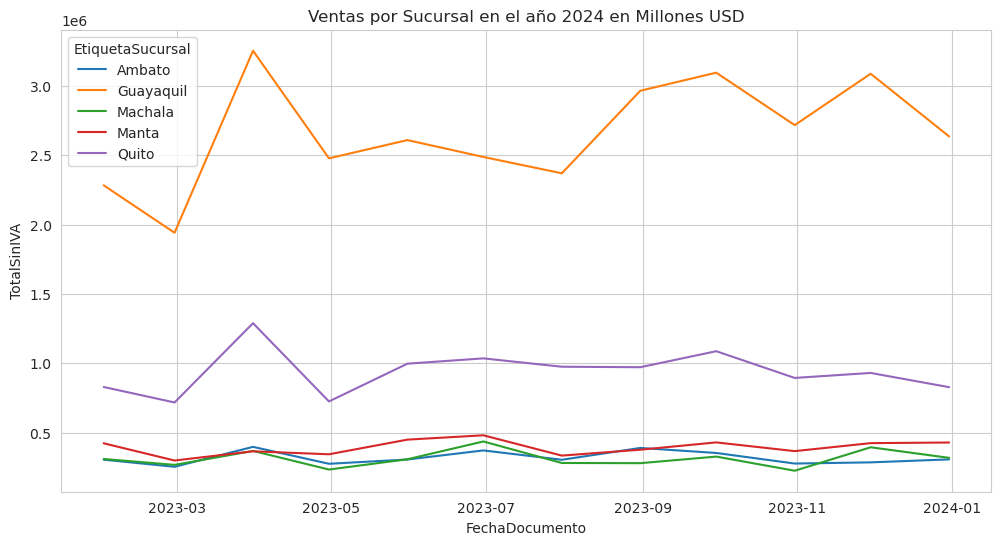

In [147]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=totales_mes, x="FechaDocumento", y="TotalSinIVA", hue="EtiquetaSucursal")
plt.title("Ventas por Sucursal en el año 2024 en Millones USD")

In [35]:
#df_filtered.to_csv('ventas.csv', index=False)

In [150]:
df_filtered['nuevo'] = (2023 - df_filtered['FechaCreacionCliente'].dt.year) < 5
df_filtered['aniosFidelizacion'] = 2023 - df_filtered['FechaCreacionCliente'].dt.year

In [151]:
total_por_años_cliente = df_filtered.groupby('aniosFidelizacion')['TotalSinIVA'].sum().reset_index()
total_por_años_cliente

,aniosFidelizacion,TotalSinIVA
0,0,1561284.49
1,1,2295509.00
2,2,3418416.65
3,3,1852769.60
4,4,1580860.18
5,5,2375553.35
6,6,1982852.38
7,7,2870930.27
8,8,2881388.79
9,9,1152451.59


<Axes: xlabel='aniosFidelizacion', ylabel='TotalSinIVA'>

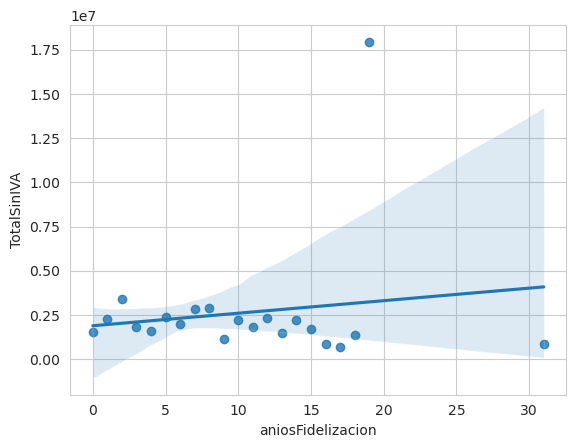

In [152]:
sns.regplot(data=total_por_años_cliente, x="aniosFidelizacion", y="TotalSinIVA")

In [153]:
total_por_15_años_cliente = df_filtered.groupby('aniosFidelizacion')['TotalSinIVA'].sum().reset_index().head(18)
total_por_15_años_cliente

,aniosFidelizacion,TotalSinIVA
0,0,1561284.49
1,1,2295509.00
2,2,3418416.65
3,3,1852769.60
4,4,1580860.18
5,5,2375553.35
6,6,1982852.38
7,7,2870930.27
8,8,2881388.79
9,9,1152451.59


In [154]:
cantidad_clientes_por_Años = df_filtered.groupby('aniosFidelizacion')['CodigoCliente'].nunique().reset_index()
cantidad_clientes_por_Años

,aniosFidelizacion,CodigoCliente
0,0,349
1,1,428
2,2,521
3,3,364
4,4,264
5,5,279
6,6,269
7,7,241
8,8,218
9,9,200


In [155]:
ventas_factura = df_filtered.groupby('NumeroDocumento')['TotalSinIVA'].sum().reset_index()
ventas_factura

,NumeroDocumento,TotalSinIVA
0,DAB0026481,56.20
1,DAB0026592,9.69
2,DAB0026593,1.97
3,DAB0026713,96.21
4,DAB0026716,19.70
...,...,...
106780,DUC0003500,213.43
106781,DUC0003501,121.96
106782,DUC0003502,91.47
106783,DUC0003516,197.56


/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


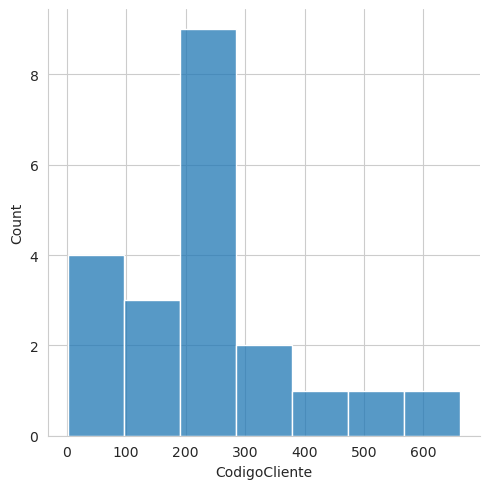

In [156]:
sns.displot(data=cantidad_clientes_por_Años, x="CodigoCliente")

<Axes: xlabel='aniosFidelizacion', ylabel='TotalSinIVA'>

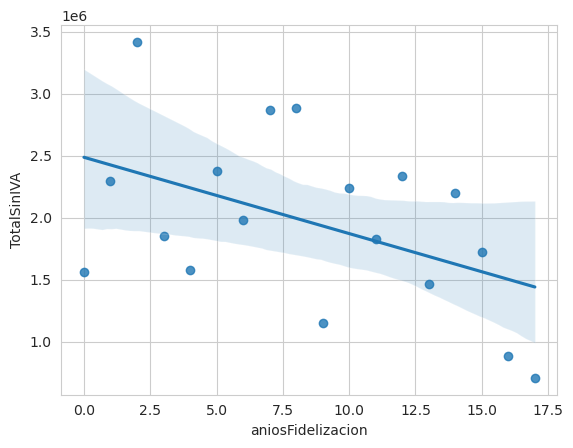

In [157]:
sns.regplot(data=total_por_15_años_cliente, x="aniosFidelizacion", y="TotalSinIVA")

In [158]:
clientes_nuevos_por_vendedores = df_filtered[df_filtered['nuevo']].groupby('CodigoVendedor')['CodigoCliente'].nunique().reset_index()

In [159]:
clientes_nuevos_por_vendedores['CodigoCliente'].mean()

43.77272727272727

10 vendedores no han traido clientes nuevos en el 2023

In [160]:
promedio_factura_cliente_nuevo = df_filtered[df_filtered['nuevo']].groupby('NumeroDocumento')['TotalSinIVA'].sum().reset_index()['TotalSinIVA'].mean()
promedio_factura_cliente_nuevo

355.84634545092047

In [161]:
promedio_factura_cliente_nuevo = df_filtered[df_filtered['nuevo']].groupby('NumeroDocumento')['TotalSinIVA'].sum().reset_index()['TotalSinIVA'].sum()
promedio_factura_cliente_nuevo

10708839.92

<Axes: xlabel='nuevo', ylabel='TotalSinIVA'>

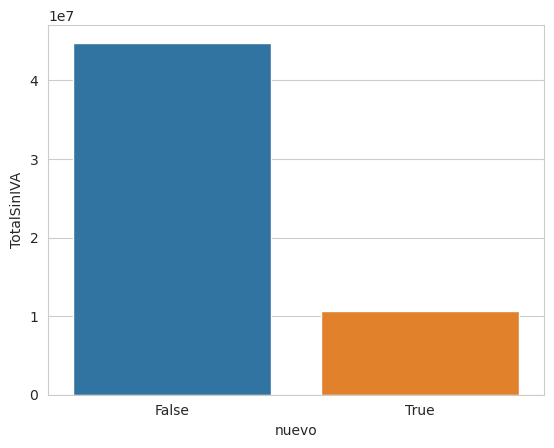

In [162]:
sns.barplot(df_filtered, x="nuevo", y="TotalSinIVA", estimator="sum", errorbar=None)

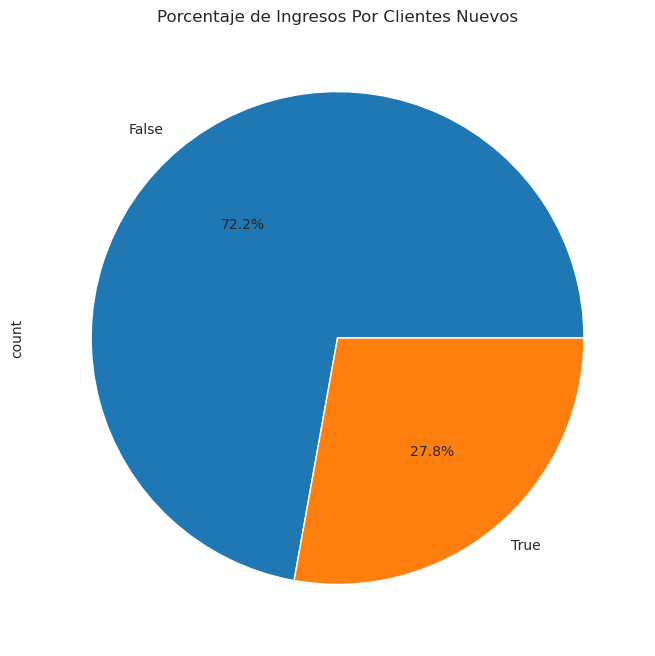

In [163]:
df_filtered['nuevo'].value_counts().plot.pie( autopct='%1.1f%%', figsize=(8,8))
plt.title('Porcentaje de Ingresos Por Clientes Nuevos')
plt.show()

In [164]:
df_filtered.groupby(['CodigoCliente', 'nuevo'])['NumeroDocumento'].nunique().reset_index()

,CodigoCliente,nuevo,NumeroDocumento
0,1000016,False,10
1,1000087,False,5
2,1000171,False,21
3,1000176,False,2
4,1000178,False,1
...,...,...,...
5176,5000898,True,9
5177,5009996,False,21
5178,5009999,False,16
5179,CU00503,True,47


In [165]:
top_clientes_viejos = df_filtered[(~df_filtered['nuevo']) & (df_filtered['TotalSinIVA']>0)].groupby(['CodigoCliente'])['TotalSinIVA'].sum().reset_index().sort_values(by='TotalSinIVA', ascending=False)
top_30 = top_clientes_viejos.head(30)
resto = top_clientes_viejos.loc[top_clientes_viejos.index.difference(top_30.index)]

In [166]:
top_clientes_nuevos = df_filtered[(df_filtered['nuevo']) & (df_filtered['TotalSinIVA']>0)].groupby(['CodigoCliente'])['TotalSinIVA'].sum().reset_index().sort_values(by='TotalSinIVA', ascending=False)

In [167]:
top_clientes_nuevos['TotalSinIVA'].mean()

5949.782663526948

In [168]:
resto['TotalSinIVA'].mean()

9758.061257000623

In [169]:
top_30['TotalSinIVA'].sum() #total top 10 clientes antigues en 20023

15991772.42

In [170]:
top_30['TotalSinIVA'].mean()

533059.0806666666

In [171]:
labels = ['1% clientes', '99% clientes']
values = [top_30['TotalSinIVA'].sum(),  resto['TotalSinIVA'].sum()]

In [172]:
data = {'labels': labels,
        'values': values}

totales_pc= pd.DataFrame(data)

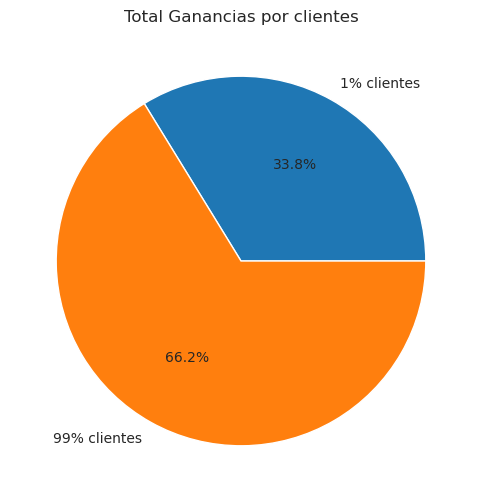

In [173]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(totales_pc['values'], labels=totales_pc['labels'], autopct='%1.1f%%')
plt.title('Total Ganancias por clientes')
plt.show()

In [174]:
def asignar_categoria(codigo):
    if str(codigo).startswith('1'):
        return 'Arquitectonica'
    elif str(codigo).startswith('2'):
        return 'Automotriz'
    elif str(codigo).startswith('3'):
        return 'Madera'
    elif str(codigo).startswith('8'):
        return 'Industrial'
    else:
        return 'Otros'

df_filtered['categoria'] = df_filtered['ClaseDeProducto'].apply(asignar_categoria)

In [175]:
totales_vendedor_cliente = df_filtered[df_filtered['CodigoSucursal']=='MA'].groupby(['CodigoVendedor', 'CodigoCliente'])['TotalSinIVA'].sum().reset_index()
totales_vendedor_cliente

,CodigoVendedor,CodigoCliente,TotalSinIVA
0,7,1000016,206.74
1,7,1000087,226.88
2,7,1000176,25.67
3,7,1000178,10.00
4,7,1000197,30.47
...,...,...,...
2404,999,1007846,122.14
2405,999,5000374,22.80
2406,999,1006152,432.98
2407,999,1006325,6.68


In [176]:
cantones = pd.read_csv('../data/cantones.csv')

In [177]:
cantones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5 non-null      int64  
 1   Sucursal               5 non-null      object 
 2   region                 5 non-null      object 
 3   superficie             5 non-null      float64
 4   provincia              5 non-null      object 
 5   # Clientes             5 non-null      int64  
 6   Universo Construccion  5 non-null      int64  
 7   % Captados             5 non-null      float64
 8   geometry               5 non-null      object 
 9   Clientes               5 non-null      int64  
 10  % Share                5 non-null      float64
dtypes: float64(3), int64(4), object(4)
memory usage: 572.0+ bytes


In [178]:
cantones.head()

,Unnamed: 0,Sucursal,region,superficie,provincia,# Clientes,Universo Construccion,% Captados,geometry,Clientes,% Share
0,0,MACHALA,COSTA,372.403254,EL ORO,222,296,75.00,POLYGON Z ((-79.92875756702288 -3.171049806114...,65,21.959459
1,1,GUAYAQUIL,COSTA,4827.076279,GUAYAS,1354,1779,76.11,MULTIPOLYGON Z (((-79.78230504658983 -2.947847...,365,20.517144
2,2,MANTA,COSTA,296.084576,MANABI,239,161,100.00,MULTIPOLYGON Z (((-81.07347253555112 -1.259911...,67,41.614907
3,3,QUITO,SIERRA,4200.905341,PICHINCHA,671,1527,43.94,POLYGON Z ((-78.49460680364508 0.2739011888077...,264,17.288802
4,4,AMBATO,SIERRA,1022.317480,TUNGURAHUA,397,371,100.00,POLYGON Z ((-78.61245227442937 -1.110025187337...,72,19.407008


In [179]:
df_filtered[df_filtered['FechaCreacionCliente'].dt.year == 2023]['CodigoCliente'].nunique() 

349

In [180]:
clientes_nuevos = df_filtered[df_filtered['FechaCreacionCliente'].dt.year == 2023]

In [181]:
clientes_nuevos_sucursal = clientes_nuevos.groupby('EtiquetaSucursal')['CodigoCliente'].nunique().reset_index()
clientes_nuevos_sucursal

,EtiquetaSucursal,CodigoCliente
0,Ambato,42
1,Guayaquil,156
2,Machala,23
3,Manta,25
4,Quito,103


In [182]:
dfw = vendedores_sucursal.merge(clientes_nuevos_sucursal, on='EtiquetaSucursal')

In [183]:
dfw['clienteNuevoPorVendedor'] = dfw['CodigoCliente'] / dfw['CodigoVendedor']

In [184]:
dfw

,EtiquetaSucursal,CodigoVendedor,CodigoCliente,clienteNuevoPorVendedor
0,Ambato,7,42,6.000000
1,Guayaquil,24,156,6.500000
2,Machala,7,23,3.285714
3,Manta,8,25,3.125000
4,Quito,16,103,6.437500


In [185]:
ticket_promedio = df_filtered[df_filtered['nuevo']].groupby('EtiquetaSucursal')['TotalSinIVA'].mean().reset_index()
ticket_promedio 

,EtiquetaSucursal,TotalSinIVA
0,Ambato,39.897514
1,Guayaquil,63.507347
2,Machala,61.770419
3,Manta,40.047938
4,Quito,47.557067


In [186]:
dfw = dfw.merge(ticket_promedio, on='EtiquetaSucursal')
dfw = dfw.rename(columns={'TotalSinIVA':'promedio_ticket'})

In [187]:
count_visitas = df_filtered[df_filtered['nuevo']].groupby(['EtiquetaSucursal', 'CodigoCliente'])['TotalSinIVA'].count().reset_index()
promedio_visitas = count_visitas.groupby('EtiquetaSucursal')['TotalSinIVA'].mean().reset_index()
promedio_visitas

,EtiquetaSucursal,TotalSinIVA
0,Ambato,68.822394
1,Guayaquil,97.601810
2,Machala,115.587786
3,Manta,109.374101
4,Quito,121.904483


In [188]:
dfw2 = dfw.merge(promedio_visitas, on='EtiquetaSucursal')

In [189]:
dfw2 = dfw2.rename(columns={'TotalSinIVA':'count_visitas', 'TotalSinIVA_y':'ticket_promedio'})

In [190]:
dfw2

,EtiquetaSucursal,CodigoVendedor,CodigoCliente,clienteNuevoPorVendedor,promedio_ticket,count_visitas
0,Ambato,7,42,6.000000,39.897514,68.822394
1,Guayaquil,24,156,6.500000,63.507347,97.601810
2,Machala,7,23,3.285714,61.770419,115.587786
3,Manta,8,25,3.125000,40.047938,109.374101
4,Quito,16,103,6.437500,47.557067,121.904483


In [191]:
final = dfw2[['EtiquetaSucursal', 'CodigoVendedor', 'CodigoCliente',
       'clienteNuevoPorVendedor', 'promedio_ticket',
       'count_visitas']].copy()

In [192]:
final['TotalAño'] = final['promedio_ticket'] * final['count_visitas']
final

,EtiquetaSucursal,CodigoVendedor,CodigoCliente,clienteNuevoPorVendedor,promedio_ticket,count_visitas,TotalAño
0,Ambato,7,42,6.000000,39.897514,68.822394,2745.842394
1,Guayaquil,24,156,6.500000,63.507347,97.601810,6198.432036
2,Machala,7,23,3.285714,61.770419,115.587786,7139.906031
3,Manta,8,25,3.125000,40.047938,109.374101,4380.207194
4,Quito,16,103,6.437500,47.557067,121.904483,5797.419747


In [194]:
cantones_fil = cantones[['Sucursal', 'Clientes', 'Universo Construccion']]
final['Sucursal'] = final['EtiquetaSucursal'].str.upper()
cantones_fil = cantones_fil.merge(final, on='Sucursal')
cantones_fil['clienteNuevoPorVendedor'] = np.round(cantones_fil['clienteNuevoPorVendedor'])
cantones_fil['estimadoNuevo'] = 2
cantones_fil['Nuevos2024'] = (cantones_fil['estimadoNuevo'] * cantones_fil['CodigoVendedor']) + cantones_fil['CodigoCliente']
cantones_fil['2024'] = cantones_fil['Clientes'] + cantones_fil['Nuevos2024']
cantones_fil['Nuevos2025'] = (cantones_fil['estimadoNuevo'] * cantones_fil['CodigoVendedor']) + cantones_fil['Nuevos2024']
cantones_fil['2025'] = cantones_fil['2024'] + cantones_fil['Nuevos2025']
cantones_fil['Nuevos2026'] = (cantones_fil['estimadoNuevo'] * cantones_fil['CodigoVendedor']) + cantones_fil['Nuevos2025']
cantones_fil['2026'] = cantones_fil['2025'] + cantones_fil['Nuevos2026']
cantones_fil['nuevoShare'] = cantones_fil['2026'] / cantones_fil['Universo Construccion']

In [195]:
cantones_fil['USDoportunidad2024'] = cantones_fil['Nuevos2024'] * cantones_fil['TotalAño']
cantones_fil['USDoportunidad2025'] = cantones_fil['Nuevos2025'] * cantones_fil['TotalAño']
cantones_fil['USDoportunidad2026'] = cantones_fil['Nuevos2026'] * cantones_fil['TotalAño']
cantones_fil['acumulado2025'] = cantones_fil['USDoportunidad2024'] + cantones_fil['USDoportunidad2025']
cantones_fil['acumulado2026'] = cantones_fil['acumulado2025'] + cantones_fil['USDoportunidad2026']
cantones_fil['netoNuevos'] = cantones_fil['Nuevos2024'] +cantones_fil['Nuevos2025'] +cantones_fil['Nuevos2026']
cantones_fil[['EtiquetaSucursal', 'netoNuevos']]

,EtiquetaSucursal,netoNuevos
0,Machala,153
1,Guayaquil,756
2,Manta,171
3,Quito,501
4,Ambato,210


In [196]:
proy = cantones_fil[['EtiquetaSucursal','2024','2025','2026']]
proy_monetario = cantones_fil[['EtiquetaSucursal','USDoportunidad2024','acumulado2025','acumulado2026']]

In [122]:
proy

,EtiquetaSucursal,2024,2025,2026
0,Machala,102,153,218
1,Guayaquil,569,821,1121
2,Manta,108,165,238
3,Quito,399,566,765
4,Ambato,128,198,282


In [123]:
df_transposed = proy.set_index('EtiquetaSucursal').T
df_transposed

EtiquetaSucursal,Machala,Guayaquil,Manta,Quito,Ambato
2024,102,569,108,399,128
2025,153,821,165,566,198
2026,218,1121,238,765,282


In [124]:
df_transposed_mon = proy_monetario.set_index('EtiquetaSucursal').T
df_transposed_mon

EtiquetaSucursal,Machala,Guayaquil,Manta,Quito,Ambato
USDoportunidad2024,2.641765e+05,1.264480e+06,179588.494964,7.826517e+05,153767.174054
acumulado2025,6.283117e+05,2.826485e+06,429260.305036,1.750821e+06,345976.141622
acumulado2026,1.092406e+06,4.686015e+06,749015.430216,2.904507e+06,576626.902703


In [197]:
df_transposed_mon['EtiquetaSucursal'] = ['2024', '2025', '2026']
df_transposed_mon.set_index('EtiquetaSucursal').reset_index()
df_transposed_mon.index = df_transposed_mon['EtiquetaSucursal']
df_transposed_mon.drop(columns=['EtiquetaSucursal'], inplace=True)

/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Proyeccion de Ventas por Millones USD de clientes nuevos hasta el 2026')

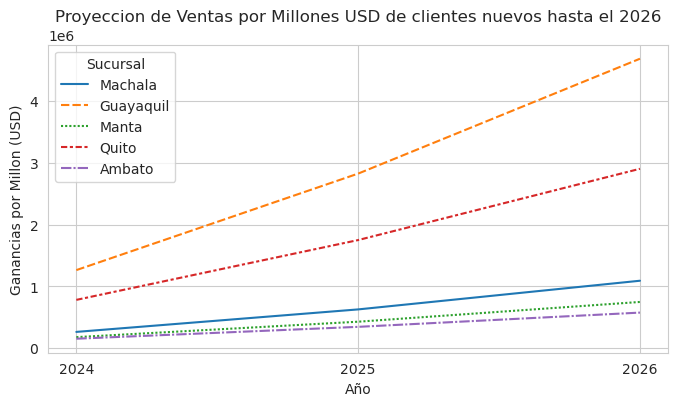

In [198]:
fig, ax = plt.subplots(figsize=(8, 4))
g = sns.lineplot(data=df_transposed_mon)
g.legend_.set_title('Sucursal')
plt.xlabel('Año')
plt.ylabel('Ganancias por Millon (USD)')
plt.title('Proyeccion de Ventas por Millones USD de clientes nuevos hasta el 2026')

In [199]:
df_transposed

EtiquetaSucursal,Machala,Guayaquil,Manta,Quito,Ambato
2024,102,569,108,399,128
2025,153,821,165,566,198
2026,218,1121,238,765,282


/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eeveloza/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

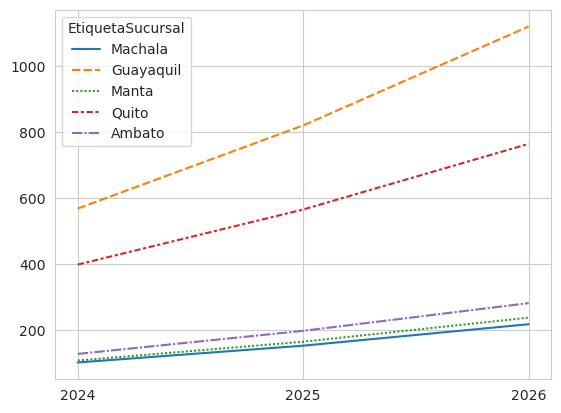

In [200]:
sns.lineplot(data=df_transposed)